In [ ]:
import numpy as np
#Metodo Jacobi

def NormaDiferenciaVect(x, y):
    return max([abs(x[i] - y[i]) for i in range(len(x))])

def Jacobi(A, b, x0, TOL, MaxIter):

    n = len(A) #longitud de la matriz de coeficientes
    x1 = x0.copy()
    it = 1
    while (it < MaxIter):
        for i in range(n):
            if(abs(A[i][i] <= 1e-15)):
                print("Imposible aplicar el metodo")
                return None
            Suma = sum(A[i][j]*x0[j] for j in range(n) if j!=i)
            x1[i] = (b[i] - Suma)/A[i][i]
        print("Vuelta:", it,"- X=",x1)
        error = NormaDiferenciaVect(x1,x0)
        print("Error=", error)
        if (error<=TOL):
            print(r"Solución encontrada")
            print(r"Cantidad de iteraciones:",it)
            return x1
        it += 1
        for i in range(n):
            x0[i] = x1[i] 
    print("Iteraciones agotadas")
    return None

A = ([2., -1., 0.],
     [1., 6., -2.], 
     [4., -3., 8.])

b = [-4.,2.,5.]
x0 = [0., 0., 0.]

solucion = Jacobi(A, b, x0, 1e-3, 20)

print("Solucion = ", solucion)

In [ ]:
#Metodo gauss-seidel
import math

def NormaDiferVector(x, y):
    return max([abs(x[i]-y[i]) for i in range(len(x))])

def GaussSeidel(A, b, x0, TOL, MaxIter):
    x1 = x0.copy()
    n = len(A)
    it = 1
    while (it <= MaxIter):
        for i in range(n):
            if abs(A[i][i] <= 1e-15):
                print("Imposible iterar")
                return None
            Suma = sum(A[i][j]*x1[j] for j in range(n) if j!=i )
            x1[i] = (b[i] - Suma)/A[i][i]
        error = NormaDiferVector(x0,x1)
        if error <= TOL:
            print("solucion encontrada")
            print(r"Cantidad de iteraciones:",it)
            return x1
        for i in range(n):
            x0[i] = x1[i]
        it += 1
    print("Iteraciones agotadas")
    return None

A = [[2., -1., 0.],
     [1., 6., -2.],
     [4., -3., 8.]]

b = [-4.,2.,5.]
x0 = [0., 0., 0.]
print("Matriz A:")
print(A)
print("Vector b:")
print(b)
print("Vector inicial x0:")
print(x0)
print("Iteración de Gauss-Seidel")
# TOL = 10−3, MAX = 50
GaussSeidel(A, b, x0, 1e-3, 30)


In [ ]:
#Metodo de interpolacion de Newton
import numpy as np

xi = np.array([4., -4., 7., 6., 2.])
yi = np.array([278.,-242., 1430., 968., 40.])

def DiferenciasDivididas(x, y):
    n = len(x)
    difDiv = np.copy(y)

    for i in range(1, n):
        #va desde n-1 a i-1 con un paso de -1 por vuelta(decrece)
        for j in range(n-1, i-1, -1): 
            difDiv[j] = (difDiv[j] - difDiv[j-1])/(x[j] - x[j-i])
    return difDiv

#Recibe de entrada las diferencias divididas(coeficientes) y el arreglo de los valores de x
def InterpolacionNewton(x, difDiv, pto):
    n = len(x)
    x1 = np.copy(x)
    x1[0] = 1 
    for i in range(1, n):
        print("x1[",i,"] <-- ", x1[i-1], "* (",pto," - ", x[i-1],")")
        x1[i] = x1[i-1] * (pto - x[i-1])
    return sum(difDiv[i] * x1[i] for i in range(n))

difDivididas = DiferenciasDivididas(xi, yi)
print("Diferencias divididas: ", difDivididas)
#valor a estimar
valorX = 5

estimacion = InterpolacionNewton(xi, difDivididas, valorX)

print("Valor de la estimacion = p(5) = ", estimacion)

In [ ]:
#Metodo Cubic Spline

import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

xi = np.array([0.9, 1.3, 1.9, 2.1,2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
fi = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

# Crea el objeto de interpolación de trazadores cúbicos
cs = CubicSpline(xi, fi)

# Generar puntos en el intervalo de xi para evaluar la interpolacion

n = len(xi)
x_interpol = np.linspace(xi[0], xi[n-1], 100)
# le asigna un arreglo con los valores estimados con CubicSpline
y_interpol = cs(x_interpol)

# Graficar puntos en el intervalo de xi para evaluar la interpolacion

# Muestra los puntos originales en el grafico
plt.scatter(xi, fi, label='Puntos originales')
plt.plot(x_interpol, y_interpol, label='Interpolación de trazadores cúbicos')
plt.grid()
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.xlim(0,14)
plt.ylim(-4,4)
plt.show()

In [ ]:
import numpy as np
# xi es un arreglo de valores de X, x es el valor a interpolar
def PolinomioLagrange(xi, valorInterpolar):
    n = len(xi)
    L = np.ones(n, float) #crea arreglo de 1's tipo float

    for i in range(n):
        for j in range(n):
            if i != j:
                # Ej L[0] = (x-x1)/(x0-x1) * (x-x2)/(x0-x2) * ...
                L[i] *= (valorInterpolar - xi[j])/(xi[i] - xi[j])
    return L
    
def EvaluarLagrange(f, L):
    n = len(L)
    estimacion = sum(f[i]*L[i] for i in range(n))
    return estimacion

xi = np.array([1.,2.,4.,6.])
x_interpolar = 3
f = np.array([1., 3., 0., -1.])

L = PolinomioLagrange(xi, x_interpolar)

resultLagrange = EvaluarLagrange(f, L)
print("El resultado de la interpolacion es: P(",x_interpolar,")=", resultLagrange)

plt.scatter(xi, f, label='Puntos originales')
plt.scatter(x_interpolar, resultLagrange, label='Punto interpolado')
plt.title('Interpolacion de Lagrange')
plt.legend()
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.grid()
plt.show()



In [ ]:
import numpy as np
import math

def f1(x):
    return x * np.cos(x**2)

def f2(x):
    return (x**2)*np.cos(x)

# f funcion, a limite izquierdo (X0), b limite derecho (Xn), n cantidad de intervalos (siempre par)
def regla_simpson_compuesta(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    suma = f(x[0]) + f(x[n])

    for i in range(1, n):
        if i % 2 == 0:
            suma += 2 * f(x[i])
        else:
            suma += 4 * f(x[i])

    integral = (h / 3) * suma
    return integral

# Estimación de la integral para diferentes valores de n
error_tol = 1e-6
prev_integral = 0
resultado = False
maxIteraciones = 50
print("Calculamos para la funcion f1")

for n in range(2, maxIteraciones*2, 2): 
    #valor de la integral con n subintervalos
    integral = regla_simpson_compuesta(f1, 0, math.pi, n)
    
    #diferencia entre los valores de dos Integrales de Simpson sucesivas
    if abs(integral - prev_integral) < error_tol:
        resultado = True
        break
    prev_integral = integral
    
if (resultado):
    print(f"Valor de la integral: {integral}")
    print(f"Número de puntos requeridos: {n}")
else:
    print(f"No se alcanzo la precision deseada")
    print(f"Número de puntos usados: {n}")
    print(f"Valor de la integral: {integral}")
    
#======================================================================================
    
print("\nCalculamos para la funcion f2")
resultado = False
#cantidad maxima de iteraciones
for n in range(2, maxIteraciones*2, 2): 
    
    #valor de la integral con n subintervalos
    integral = regla_simpson_compuesta(f2, 0, math.pi, n)
    
    #diferencia entre los valores de dos Integrales de Simpson sucesivas
    if abs(integral - prev_integral) < error_tol:
        resultado = True
        break
    prev_integral = integral
    
if (resultado):
    print(f"Valor de la integral: {integral}")
    print(f"Número de puntos requeridos: {n}")
else:
    print(f"No se alcanzo la precision deseada")
    print(f"Número de puntos usados: {n}")
    print(f"Valor de la integral: {integral}")

xi = np.linspace(0, math.pi, 100)

plt.plot(xi, f1(xi))
plt.grid()
plt.title('Funcion 1')
plt.ylim(min(f1(xi)) - 1, max(f1(xi)) + 1)
plt.xlim(0, math.pi)
plt.show()

plt.plot(xi, f2(xi))
plt.grid()
plt.title('Funcion 2')
plt.ylim(min(f2(xi)) - 1, max(f2(xi)) + 1)
plt.xlim(0, math.pi)
plt.show()


Calculo para la funcion f1(x)= sen(10x)
Valor de la integral: 0.059113728066074636
n: 159


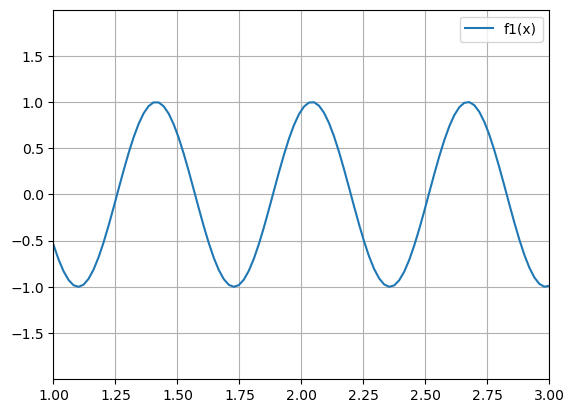

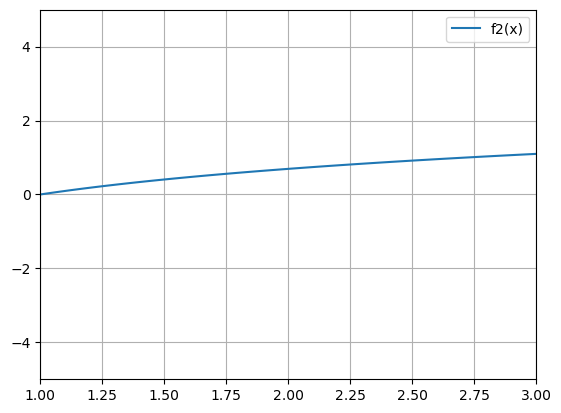

In [108]:
# Metodo del Trapecio Compuesta
import numpy as np

def f1(x):
    return np.sin(10*x)

def f2(x):
    return np.log(x)

def regla_trapecio_compuesta(f, a, b, n):
    h = (b-a)/n
    x = np.linspace(a, b, n+1)
    suma = f(a) + f(b)
    for i in range(1,n):
        suma += 2*f(x[i])
    integral = (h/2)*suma
    return integral

#======================================================================
print("\nCalculo para la funcion f1(x)= sen(10x)")
prev_integral = 0
error_tol = 1e-6
resultado = False
MaxIter = 1000
for n in range(2, MaxIter):
    integral = regla_trapecio_compuesta(f1,0,2,n)
    if abs(integral-prev_integral) <= error_tol:
        resultado = True
        break
    prev_integral = integral

if (resultado):
    print(f"Valor de la integral: {integral}")
    print(f"n: {n}")
else:
    print(f"No se alcanzo la precision deseada")

xi = np.linspace(1,3,100)
plt.plot(xi, f1(xi), label='f1(x)')
plt.grid()
plt.xlim(1,3)
plt.ylim(min(f1(xi))-1, max(f1(xi)) + 1)
plt.legend()
plt.show()

plt.plot(xi, f2(xi), label='f2(x)')
plt.xlim(1,3)
plt.ylim(-5, 5)
plt.legend()
plt.grid()
plt.show()